# Quantitative Methods Part I

In [1]:
import pandas as pd
import numpy as np

## Geometric Mean

In [2]:
from scipy.stats.mstats import gmean 

In [3]:
# The most recent five years of total returns for two US large-cap value equity mutual funds in 2018
d = {'Year': [2013, 2014, 2015, 2016, 2017], 
     'Selected American Shares (SLASX) %': [34.90, 6.13, 2.69, 11.66, 21.77], 
     'T. Rowe Price Equity Income (PRFDX)%':[31.69, 7.75, -7.56, 18.25, 16.18]}
df = pd.DataFrame(data=d)
df

,Year,Selected American Shares (SLASX) %,T. Rowe Price Equity Income (PRFDX)%
0,2013,34.90,31.69
1,2014,6.13,7.75
2,2015,2.69,-7.56
3,2016,11.66,18.25
4,2017,21.77,16.18


In [4]:
# Calculate the geometric mean return of SLASX
slasx = df['Selected American Shares (SLASX) %'].tolist()

\begin{equation*}
R_{t} + 1 = \sqrt[t]{(1+R_{1})(1+R_{2})...(1+R_{t})}
\end{equation*}


In [5]:
# Redefine returns to make them positive by adding 1.0
g_slasx = list(map(lambda i: i/100+1, slasx))

In [6]:
gmean(g_slasx) -1

0.14858526227425917

\begin{equation*}
G = \sqrt[n]{x_{1}x_{2}...x_{n}}
\end{equation*}with $X_{i}≥0$ for i=1,2,…,n.


In [7]:
# Calculate the arithmetic mean return of SLASX and contrast it to the fund’s geometric mean return
df['Selected American Shares (SLASX) %'].mean()

15.429999999999998

In [8]:
# Calculate the geometric mean return of PRFDX
g_prfdx = list(map(lambda i: i/100+1, df['T. Rowe Price Equity Income (PRFDX)%'].tolist()))
gmean(g_prfdx) - 1

0.1249999599109004

In [9]:
# Calculate the arithmetic mean return of PRFDX and contrast it to the fund’s geometric mean return
df['T. Rowe Price Equity Income (PRFDX)%'].mean()

13.262

#### Using Geometric and Arithmetic Mean
Goal 1. Explain the choice of the said mean values in different context. 

*$R_{G}$ for historic performance with semilogarithmic scales* 

In [10]:
# y-axis in log scale


*$\bar{X}$ for expected returns*

## Harmonic Mean and Weighted Mean
<br>
Use case 1: "Cost averaging" which requires periodic investment of a fixed amount of money. 

In [11]:
import statistics

In [12]:
price_per_share = [12.1, 13.5, 17, 11.98, 15]

In [13]:
print("Harmonic Mean is % s " % (statistics.harmonic_mean(price_per_share))) 

Harmonic Mean is 13.67310629317005 


#### Weighted Mean<Br>
A portfolio’s return is a weighted mean return computed from the returns on the individual assets, where the weight applied to each asset’s return is the fraction of the portfolio invested in that asset.

## Quantiles

**Real time data application**

In [14]:
# Web scraping Euro Stoxx 50 data
import csv
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen("https://www.dividendmax.com/market-index-constituents/euro-stoxx-50")
soup = BeautifulSoup(html, "html.parser")
table = soup.findAll("table")[0]
rows = table.findAll("tr")

with open("editors.csv", "wt+", newline="") as f:
    writer = csv.writer(f)
    for row in rows:
        csv_row = []
        for cell in row.findAll(["td", "th"]):
            csv_row.append(cell.get_text())
        writer.writerow(csv_row)

In [15]:
euro_stoxx = pd.read_csv('editors.csv')

In [16]:
euro_stoxx.head()

,Company,Exchange,Price,Currency,\nMarket Cap\n\n
0,🇫🇷AIAir Liquide S.A,Euronext Paris (France),€135.50,EUR,€42.3bn
1,🇩🇪ALVAllianz SE,Frankfurt Stock Exchange (Germany),€163.62,EUR,€73.9bn
2,🇧🇪ABIAnheuser-Busch In Bev SA/NV,Euronext Brussels (Belgium),€46.23,EUR,€74.3bn
3,🇱🇺MTLArcelorMittal,Luxembourg Stock Exchange (Luxembourg),€12.94,EUR,€19.5bn
4,🇳🇱ASMLASML Holding NV,Euronext Amsterdam (Netherlands),€314.70,EUR,€132.1bn


Quantiles in practice: determing or approximating the value of a percentile (when the location is not a whole number). 

\begin{equation*}
L_{y} = (n+1) * \frac{y}{100}
\end{equation*}

In [17]:
# Make a function for calculating Ly with a given column and desired percentile
def loc_y(column, percentile):
    n = len(column)
    loc = (n+1)*percentile/100
    return loc

#### Situation I
When the location, $L_{y}$, is a whole number, the location corresponds to an actual observation. 
<br>$X_{i}$ is defined as the value of the observation in the ith ($i = L_{60}$) position of the data sorted in ascending order (i.e., $P_{30} =8.16$).

#### Situation II
When $L_{y}$ is not a whole number or integer, $L_{y}$ lies between the two closest integer numbers (one above and one below), and we use **linear interpolation** between those two places to determine $P_{y}$.

Making a function to calculate $P_{y}$ given an array (observation) and the percentile of interest. 

**Practice based on CFA textbook example data:**

In [18]:
his_euro_stoxx = pd.read_csv('euro_stoxx_2018_nov.csv', delimiter=';')

In [19]:
his_euro_stoxx.head()

,No.,Company,Market Cap (Euro Billion)
0,1,RWE,9.9
1,2,Carrefour,12.2
2,3,E.ON,15.5
3,4,Inditex,15.5
4,5,Unibail Rodamco,16.1


In [20]:
# 1. Turn the column into a list and sort ascending
# 2. Get location
# 3. Calculate Py based on the location: if y is integer, direct indexing; if not an integer, use linear interpolation
def p_given_percent(column, percentile):
    list1 = column.tolist()
    sorted_list = sorted(list1)
    n = len(sorted_list)
    loc = (n+1)*percentile/100
    if loc.is_integer():
        print('Ly is an integer,', percentile, '% of data lies at or below Py =', sorted_list[(int(loc)-1)])
    else:
        i = int(loc)
        P_approx = float(sorted_list[i-1]) + (float(loc) - i) * (float(sorted_list[i]) - float(sorted_list[i-1]))
        print('Ly is not an integer, Py is approximately', P_approx, sorted_list[i-1], 'and', sorted_list[i], 'bracket Py from below and above, respectively.')
        
# WIP        

In [21]:
?isinstance

In [22]:
# 10th percentile     
p_given_percent(his_euro_stoxx['Market Cap (Euro Billion)'], 10)

Ly is not an integer, Py is approximately 16.16 16.1 and 16.7 bracket Py from below and above, respectively.


In [23]:
# 90th percentile     
p_given_percent(his_euro_stoxx['Market Cap (Euro Billion)'], 90)

Ly is not an integer, Py is approximately 104.7 104.7 and 104.7 bracket Py from below and above, respectively.


In [24]:
# Second quartile
p_given_percent(his_euro_stoxx['Market Cap (Euro Billion)'], 50)

Ly is not an integer, Py is approximately 37.5 36.6 and 38.4 bracket Py from below and above, respectively.


In [25]:
# First quintile 
p_given_percent(his_euro_stoxx['Market Cap (Euro Billion)'], 20)

Ly is not an integer, Py is approximately 20.52 20.1 and 22.2 bracket Py from below and above, respectively.


In [26]:
# Value of the median
np.median(his_euro_stoxx['Market Cap (Euro Billion)'])

37.5

In [27]:
# How many quintiles are there, and to what percentiles do the quintiles correspond? 
# Answer: 4, P20, P40, P60 and P80

Real time Euro Stoxx data application. Example 1 with $L_{y}$ as a whole number. 

**Solution 1.** Step by step

In [28]:
# Change Price data type as float, get rid of € symbol
euro_stoxx['Price'] = euro_stoxx['Price'].str.replace('€', '')
price = pd.to_numeric(euro_stoxx['Price']).tolist()
price = sorted(price)

In [29]:
# Obtaining the location (i) at 60th percentile
loc_y(euro_stoxx['Company'], 60)

30.0

Since $L_{y}$ is a whole number, $P_{60}$ = $X_{30}$

In [30]:
# Get value of X30 (= P60)
price[29]

46.04

**Solution 2.** Using `p_given_stoxx()` funtion

In [31]:
# Using p_given_percent() funtion:
p_given_percent(euro_stoxx['Price'], 60)

Ly is an integer, 60 % of data lies at or below Py = 36.01


60% of the values in this data set lies at or below €44.78 in price.  

**Solution 3.** Using Numpy's `percentile` function

To verify the above calculation for future efficiency, I proceed with using Numpy's `percentile` function to obtain the value. 

In [32]:
# Obtain the value at 60th percentile
np.percentile(price, 60)
# But this is not in the observation, what went wrong?

44.87199999999998

Example 2 with $L_{y}$ as a fraction.  

**Solution 1.** Step by step

In [33]:
# Obtaining the location (i) at 75th percentile
print('The location is at', loc_y(euro_stoxx['Company'], 75))

The location is at 37.5


The value of $P_{y}$ need to be approximated between $X_{37}$ and $X_{38}$.

In [34]:
# Obtain values on both sides of Ly
X37 = price[36]
X38 = price[37]

In [35]:
# Linear interpolation
P75_approx = X37 + (37.5 - 37) * (X38 - X37)
P75_approx

78.425

**Solution 2.** Using `p_given_percent()` function

In [36]:
p_given_percent(euro_stoxx['Price'], 75)

Ly is not an integer, Py is approximately 52.644999999999996 51.98 and 53.31 bracket Py from below and above, respectively.


**Solution 3.** Verify with Numpy `percentile`

In [37]:
# Obtain the value at 75th percentile
np.percentile(price, 75)

71.52

## Quantiles in Investment Practice
<br>
Quantiles are used in portfolio performance evaluation as well as in investment strategy development and research.

**User case 1. Ranking performance—for example, the performance of portfolios.**<br>


**User case 2. Investment research<br>**
Analysts refer to a group defined by a particular quantile as that quantile. For example, analysts often refer to the set of companies with returns falling below the 10th percentile cutoff point as the bottom return decile. Dividing data into quantiles based on some characteristic allows analysts to evaluate the impact of that characteristic on a quantity of interest. For instance, empirical finance studies commonly rank companies based on the market value of their equity and then sort them into deciles. The 1st decile contains the portfolio of those companies with the smallest market values, and the 10th decile contains those companies with the largest market value. Ranking companies by decile allows analysts to compare the performance of small companies with large ones.

**Investment style based on liquidity**<br>
Ibbotson et al. (2018): Investment style based on liquidity—buying stocks of less liquid stocks and selling stocks of more liquid stocks.<br>
Computed:
- yearly measures of liquidity as the annual share turnover (the sum of the 12 monthly volumes divided by each month’s shares outstanding);
- size as the year-end market capitalization; 
- value as the trailing earnings-to-price ratio as of the year end;
- momentum as the annual return. 

Step 1. assigned one-fourth of the total sample with the lowest liquidity in a year to Quartile 1 and the one-fourth with the highest liquidity in that year to Quartile 4.

Step 2. treating each quartile group as a portfolio composed of equally weighted stocks, they measured the returns on each liquidity quartile in the following year (so that the quartiles are constructed “before the fact”.) 

## Measure of Dispersion
The most common measures of *(absolute) dispersion*: range, mean absolute deviation, variance, and standard deviation.

#### Mean Absolute Deviation (MAD)

In [38]:
# Changing Price column as numeric data type
euro_stoxx['Price'] = pd.to_numeric(euro_stoxx['Price'])

In [39]:
# Obtaining the mean absolute deviation using Pandas mad function
euro_stoxx['Price'].mad()

59.75622657226156

#### Population Variance and Standard Deviation

$\sigma^2 = \frac{\displaystyle\sum_{i=1}^{N} (X_{i} - \mu)^2}{N}$

$\sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{N} (X_{i} - \mu)^2}{N}}$

In practice, only used for well-defined group that can be considered to represent the population.

In [40]:
# Obtaining the variance
euro_stoxx['Price'].var(ddof=0)

7224.255193419408

In [41]:
# Obtaining the standard deviation 
euro_stoxx['Price'].std(ddof=0)

84.99561867190219

#### Mean Variance and Standard Deviation
Present the arithmetic mean and standard deviation together when summarizing data. When dealing with data that represent a time series of percent changes, presenting the geometric mean—representing the compound rate of growth—is also very helpful.

$s^2 = \frac{\displaystyle\sum_{i=1}^{n} (X_{i} - \bar{X})^2}{n-1}$

$s = \sqrt{\frac{\displaystyle\sum_{i=1}^{n} (X_{i} - \bar{X})^2}{n-1}}$

In [42]:
# Obtaining the variance, with ddof = 1 (default value for Pandas std function)
euro_stoxx['Price'].var(ddof=1)

7374.760509948978

In [43]:
# Obtaining the standard deviation, with ddof = 1 (default value for Pandas std function)
euro_stoxx['Price'].std(ddof=1)

85.87642581028264

#### Semivariance and Semideviation for Downside Risks
Similar concept for *Target semivariance and target semideviation*

$s_{semi}^2 = \frac{\displaystyle\sum_{\forall X_{i}\leq\bar{X}}^{n} (X_{i} - \bar{X})^2}{n-1}$

$s_{semi} = \sqrt{\frac{\displaystyle\sum_{\forall X_{i}\leq\bar{X}}^{n} (X_{i} - \bar{X})^2}{n-1}}$

In [44]:
# Compute the calculation with stock data


#### Chebyshev’s Inequality
According to Chebyshev’s inequality, for any distribution with finite variance, the proportion of the observations within k standard deviations of the arithmetic mean is at least $1 − \frac{1}{k^2}$ for all k > 1.<br>
A two-standard-deviation interval around the mean must contain at least 75 percent of the observations, and a three-standard-deviation interval around the mean must contain at least 89 percent of the observations, no matter how the data are distributed.

In [45]:
0.95 + 2 * 5.39

11.729999999999999

In [46]:
0.95 - 2 * 5.39

-9.83

#### Coefficient of Variation (CV)
A scale-free measure of relative dispersion, by expressing the magnitude of variation among observations relative to their average size, the CV permits direct comparisons of dispersion across different data sets.

$CV = \frac{s}{\bar{X}}$

In [47]:
index_returns = {'Market': ['Australia', 'Hong Kong SAR', 'Japan', 'South Korea'], 
     'Arithmetic Mean Return (%)': [5.3, 5.6, 15.7, 4.2], 
     'Standard Deviation of Return (%)':[11.9, 15.8, 16.3, 8.6]}
index = pd.DataFrame(data=index_returns)
index

,Market,Arithmetic Mean Return (%),Standard Deviation of Return (%)
0,Australia,5.3,11.9
1,Hong Kong SAR,5.6,15.8
2,Japan,15.7,16.3
3,South Korea,4.2,8.6


In [48]:
# Obtaining the coefficent of variance for each index
index['CV'] = index['Standard Deviation of Return (%)'] / index['Arithmetic Mean Return (%)']

In [49]:
# Ranking CV by ascending order
index.sort_values(by=['CV'])

,Market,Arithmetic Mean Return (%),Standard Deviation of Return (%),CV
2,Japan,15.7,16.3,1.038217
3,South Korea,4.2,8.6,2.047619
0,Australia,5.3,11.9,2.245283
1,Hong Kong SAR,5.6,15.8,2.821429


Determine whether there is more difference between the absolute or the relative riskiness of the Australia and South Korea markets.

In [50]:
# Std (consider using %)
11.9-8.6

3.3000000000000007

In [51]:
# CV (consider using %)
2.25-2.05

0.20000000000000018

## Skewness

In [52]:
# Making a Pandas Dataframe of 10 years of annual returns on the T. Rowe Price Equity Income Fund (PRFDX).
RoR = {'Year':[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], 
     'Return (%)':[-35.75, 25.62, 15.15, -0.72, 17.25, 31.69, 7.75, -7.76, 18.25, 16.18]}
rate_of_return = pd.DataFrame(data=RoR)
rate_of_return

,Year,Return (%)
0,2008,-35.75
1,2009,25.62
2,2010,15.15
3,2011,-0.72
4,2012,17.25
5,2013,31.69
6,2014,7.75
7,2015,-7.76
8,2016,18.25
9,2017,16.18


In [53]:
from matplotlib import pyplot as plt
%matplotlib inline

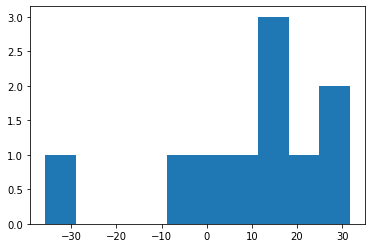

In [54]:
# Plot the distribution
plt.hist(rate_of_return['Return (%)']);

In [55]:
# Calculate the skewness Sk
rate_of_return['Return (%)'].skew()

-1.4033657997639521

## Kurtosis in Return Distribution
If a return distribution has positive excess kurtosis (leptokurtosis) and we use statistical models that do not account for the fatter tails, we will underestimate the likelihood of very bad or very good outcomes.

Sample excess kurtosis formula

In [56]:
import scipy
import scipy.stats as stats
from scipy.stats import norm, kurtosis, skew

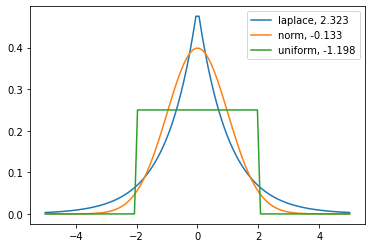

In [57]:
# An example illustration from SciPy documentation
x = np.linspace(-5, 5, 100)
ax = plt.subplot()
distnames = ['laplace', 'norm', 'uniform']

for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()

Calculating kurtosis and sample excess kurtosis using SciPy's `kurtosis` function

In [58]:
# Calculate the Kurtosis of T. Rowe Price Equity Income Fund (PRFDX) returns
kurtosis(rate_of_return['Return (%)'])

0.7639701249639383

In [59]:
# Calculate the Sample Excess Kurtosis of T. Rowe Price Equity Income Fund (PRFDX) returns
kurtosis(rate_of_return['Return (%)'], fisher=False) 

3.7639701249639383

The above result is different from that from using $K_{E}$ formula, which is 2.32. 

## Probability

#### Empirical probability
Relationships must be stable through time for empirical probabilities to be accurate.

#### Priori probability 
*Pairs arbitrage trade*: a trade in two closely related stocks involving the short sale of one and the purchase of the other.

#### Subjective probability 

#### Conditional Probability: P(A | B) 
$P(A | B) = P(AB)/P(B), P(B) ≠ 0$ 
<div style="text-align: right"> Equation 1 </div>

#### Joint Probability: P(AB)

*Multiplication Rule for Probability*<br>
The joint probability of A and B can be expressed as $P(AB) = P(A | B)P(B)$  
<div style="text-align: right"> Equation 2 </div>

*Addition Rule for Probabilities*<br>
$P(A or B) = P(A) + P(B) – P(AB)$
<div style="text-align: right"> Equation 3 </div>

*Independence and dependence*<br>
An area of intense interest to investment managers and their clients is whether records of past performance are useful in identifying repeat winners and losers.

*Multiplication Rule for Independent Events*<br>
$P(AB) = P(A)P(B)$  
<div style="text-align: right"> Equation 4</div>

*The Total Probability Rule*<br>
$P(A)=P(AS)+P(AS^C)=P(A|S)P(S)+P(A∣S^C)P(S^C)$
<div style="text-align: right"> Equation 5</div>

$P(A)=P(AS_1)+P(AS_2)+…+P(AS_n)=P(A|S_1)P(S_1)+P(A|S_2)P(S_2)+…+P(A|S_n)P(S_n)$      (where $S_1, S_2, …, S_n$ are mutually exclusive and exhaustive scenarios or events.)
<div style="text-align: right"> Equation 6</div>

## Expected Value (Mean), Variance, and Conditional Measures of Expected Value and Variance

#### Expected Value (Mean)

$E(X) = \displaystyle\sum_{i=1}^n{P(X_{i})X_{i}}$      (Where $X_{i}$ is one of n possible outcomes of X) 
<div style="text-align: right"> Equation 7</div>

In [60]:
# BankCorp’s Earnings per Share
eps = {'Probability': [0.15, 0.45, 0.24, 0.16], 
     'EPS ($)': [2.60, 2.45, 2.20, 2.00]}
eps_ev = pd.DataFrame(data=eps)
eps_ev

,Probability,EPS ($)
0,0.15,2.60
1,0.45,2.45
2,0.24,2.20
3,0.16,2.00


In [61]:
# Calculate the E(X) of BankCorp’s Earnings per Share: multiplying each prediction with its probability
eps_ev['probability_weighted_EPS'] = eps_ev['Probability']*eps_ev['EPS ($)']
eps_ev

,Probability,EPS ($),probability_weighted_EPS
0,0.15,2.60,0.3900
1,0.45,2.45,1.1025
2,0.24,2.20,0.5280
3,0.16,2.00,0.3200


In [62]:
expected_eps = eps_ev['probability_weighted_EPS'].tolist()
ev=sum(expected_eps)

#### Variance and Standard Deviation (the risks associated with E(X))

$Var(X)=\sigma^2(X)=E\{[X−E(X)]^2\}$  

<div style="text-align: right"> Equation 8 </div><br>(Variance of X is a quantity in the squared units of X. For example, if the random variable is return in percent, variance of return is in units of percent squared.) 

In [66]:
# Calculating the variance 
list1=[]
for i in range(len(eps_ev['EPS ($)'])):
    diff = eps_ev['EPS ($)'][i] - ev
    diff_sqr = diff**2
    eps = diff_sqr*eps_ev['Probability'][i]
    #print(eps)
    list1.append(eps)

print(list1)
print(sum(list1))

0.25950000000000006
0.10950000000000015
-0.14049999999999985
-0.3405
[0.010101037500000005, 0.0053956125000000155, 0.004737659999999989, 0.018550440000000005]
0.03878475000000002


Standard deviation is easier to interpret than variance, as it is in the same units as the random variable. 

In [ ]:
# Calculating the standard deviation 
sum(list1)**0.5

$\sigma^2(X)=P(X1)[X1−E(X)]2+P(X2)[X2−E(X)]2            +…+P(Xn)[Xn−E(X)]2=∑i=1nP(Xi)[Xi−E(X)]2 $  
(where Xi is one of n possible outcomes of the random variable X)  

<div style="text-align: right"> Equation 9</div>

#### Conditional Expected Value


<div style="text-align: right"> Equation 10</div>

*The Total Probability Rule for Expected Value*


<div style="text-align: right"> Equation 11</div>


<div style="text-align: right"> Equation 12</div>

#### Conditional Variance 
The relationship between conditional variance and unconditional one (to be continued in later sessions)

## Covariance, Correlation, and Expected Value, Variance and Standard Deviation of Portfolio Returns

#### Calculation of Portfolio Expected Return<br>
Let $w_{i}$ be any constant and $R_{i}$ be a random variable.

$E(R_{p})=E(w_{1}R_{1}+w_{2}R_{2}+…+w_{n}R_{n})=w_{1}E(R_{1})+w_{2}E(R_{2})+…+w_{n}E(R_{n})$    
<div style="text-align: right"> Equation 13</div>

#### Covariance 
Given two random variables Ri and Rj, the covariance between $R_{i} and R_{j}$ is

$Cov(R_{i},R_{j})=E[(R_{i}−ER_{i})(R_{j}−ER_{j})]$<br>
(also known as $\sigma_{(R_{i}, R_{j})}$ or $\sigma{_{ij}}$

Covariance of a sample of historical data about the two variables:
<br>
$Cov(R_{i},R_{j})=\frac{\displaystyle\sum_{i=1}^{n} {(R_{i,t}-\bar{R_{i}})(R_{j,t}-\bar{R_{j})}}}{(n−1)}$<br><br>
*If the random variables are returns, the units of both forward-looking covariance and historical variance would be returns squared.*

In [ ]:
# Covariance Matrix example 
matrix = {'Unit: percent squared': ['S&P 500', 'US long-term corporate bonds', 'MSCI EAFE'], 
     'S&P 500': [400, 45, 189], 'US long-term corporate bonds':[45, 81, 38], 'MSCI EAFE':[189, 38, 441]}
cov_matrix = pd.DataFrame(data=matrix)
cov_matrix

# Quantitative Methods Part II